In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Dataset shape: (768, 10)
   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2      

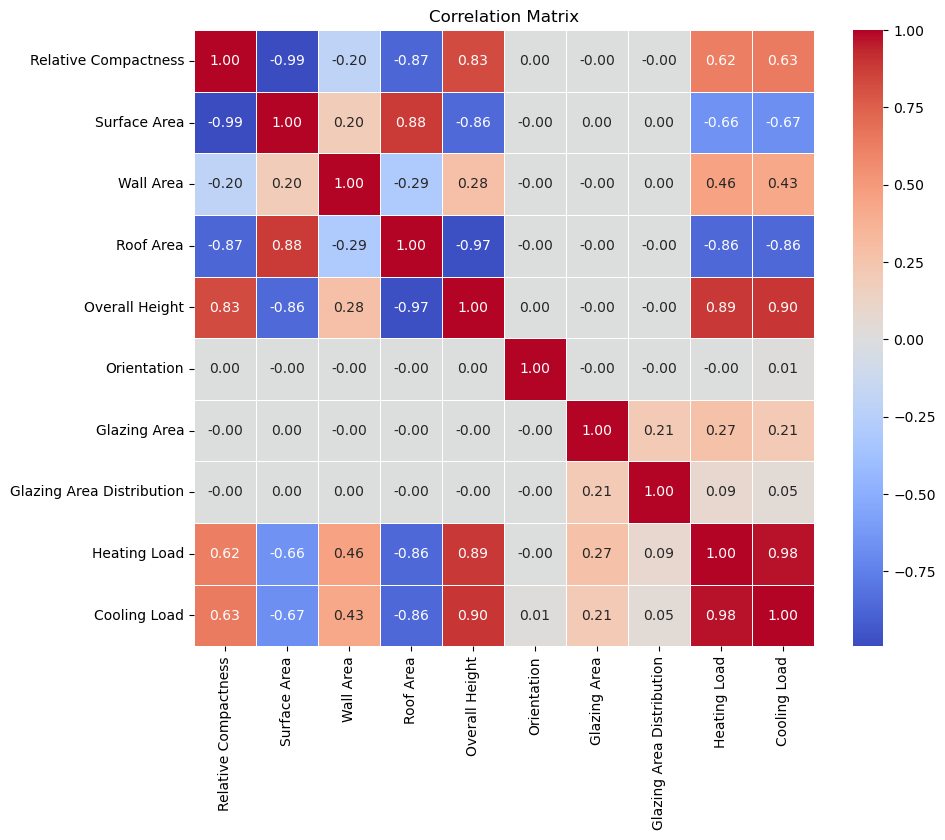


Potential outliers:
 Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
data.columns = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
    "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"
]
print("Dataset shape:", data.shape)
print(data.head())
print("\nMissing values:\n", data.isnull().sum())
correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nPotential outliers:\n", outliers)



In [14]:
# (ii) Split the dataset into training and testing
X = data.drop(["Heating Load", "Cooling Load"],axis=1)
y = data["Heating Load"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



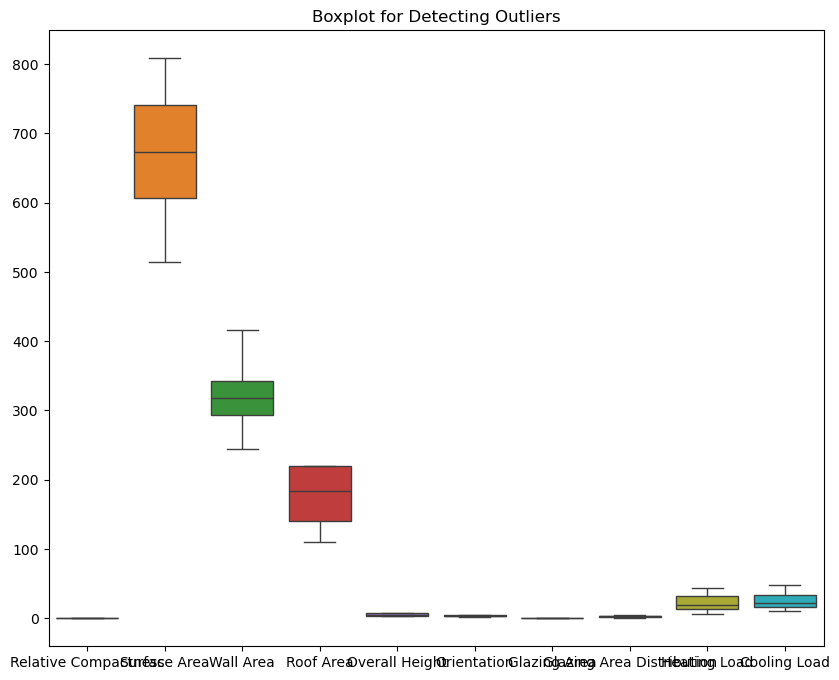

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [18]:
# (iii) Train a multivariate linear regression model from scratch
class LinearRegressionFromScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
        return X @ self.weights

# Train the model
manual_model = LinearRegressionFromScratch()
manual_model.fit(X_train.values, y_train.values)
y_pred_manual = manual_model.predict(X_test.values)

# Train sklearn linear regression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

# Train ridge and lasso regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)



Manual Linear Regression:
 R2 Score: -372.906
 MSE: 38973.124
 RMSE: 197.416

Sklearn Linear Regression:
 R2 Score: 0.912
 MSE: 9.141
 RMSE: 3.023

Ridge Regression:
 R2 Score: 0.907
 MSE: 9.653
 RMSE: 3.107

Lasso Regression:
 R2 Score: 0.794
 MSE: 21.465
 RMSE: 4.633


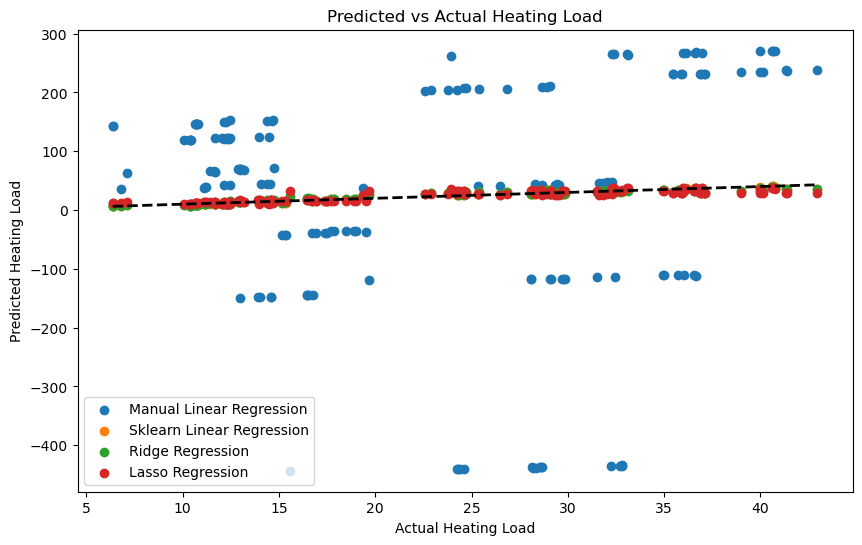

In [16]:

# (iv) Evaluate models
models = {
    "Manual Linear Regression": y_pred_manual,
    "Sklearn Linear Regression": y_pred_sklearn,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso
}

for model_name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n{model_name}:\n R2 Score: {r2:.3f}\n MSE: {mse:.3f}\n RMSE: {rmse:.3f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Predicted vs Actual Heating Load")
plt.legend()
plt.show()



In [19]:
# (v) Energy efficiency improvement suggestions
# Analyze feature importance from the sklearn linear regression model
importance = pd.Series(sklearn_model.coef_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", importance)

print("\nSuggestions for energy efficiency improvement:")
print("- Focus on optimizing features like", importance.idxmax(), "as it has the most significant impact on Heating Load.")
print("- Consider improving insulation and thermal performance of", importance.index[1], "and", importance.index[2], ".")



Feature Importance:
 Surface Area                 1.074094e+12
Glazing Area                 2.013880e+01
Overall Height               4.118945e+00
Glazing Area Distribution    2.108351e-01
Orientation                 -3.369912e-02
Relative Compactness        -6.057636e+01
Wall Area                   -1.074094e+12
Roof Area                   -2.148188e+12
dtype: float64

Suggestions for energy efficiency improvement:
- Focus on optimizing features like Surface Area as it has the most significant impact on Heating Load.
- Consider improving insulation and thermal performance of Glazing Area and Overall Height .
